# Counting missing rows with left join

The Movie Database is supported by volunteers going out into the world, collecting data, and entering it into the database. This includes financial data, such as movie budget and revenue. If you wanted to know which movies are still missing data, you could use a left join to identify them. Practice using a left join by merging the `movies` table and the `financials` table.

The `movies` and `financials` tables have been loaded for you.

In [3]:
import pandas as pd
movies = pd.read_pickle("dataset/movies.p")
financials = pd.read_pickle("dataset/financials.p")

print(movies.columns)
print(financials.columns)
print("ID column")

Index(['id', 'title', 'popularity', 'release_date'], dtype='object')
Index(['id', 'budget', 'revenue'], dtype='object')
ID column


In [4]:
# Merge the movies table with the financials table with a left join
movies_financials = movies.merge(financials, on='id', how='left')

# Count the number of rows in the budget column that are missing
number_of_missing_fin = movies_financials['budget'].isnull().sum()

# Print the number of movies missing financials
print(number_of_missing_fin)

1574


# Enriching a dataset

Setting `how='left'` with the `.merge()` method is a useful technique for enriching or enhancing a dataset with additional information from a different table. In this exercise, you will start off with a sample of movie data from the movie series Toy Story. Your goal is to enrich this data by adding the marketing tag line for each movie. You will compare the results of a left join versus an inner join.

The `toy_story` DataFrame contains the Toy Story movies. The `toy_story` and `taglines` DataFrames have been loaded for you.

In [7]:
toy_story = movies[movies['title'].str.contains("Toy Story")]
taglines = pd.read_pickle("dataset/taglines.p")

# Merge the toy_story and taglines tables with a left join
toystory_tag = toy_story.merge(taglines, on="id", how="left")

# Print the rows and shape of toystory_tag
print(toystory_tag)
print(toystory_tag.shape)

      id        title  popularity release_date                   tagline
0  10193  Toy Story 3   59.995418   2010-06-16  No toy gets left behind.
1    863  Toy Story 2   73.575118   1999-10-30        The toys are back!
2    862    Toy Story   73.640445   1995-10-30                       NaN
(3, 5)


In [8]:
# Merge the toy_story and taglines tables with a inner join
toystory_tag = toy_story.merge(taglines, on="id", how="inner")

# Print the rows and shape of toystory_tag
print(toystory_tag)
print(toystory_tag.shape)

      id        title  popularity release_date                   tagline
0  10193  Toy Story 3   59.995418   2010-06-16  No toy gets left behind.
1    863  Toy Story 2   73.575118   1999-10-30        The toys are back!
(2, 5)


# How many rows with a left join?

Select the true statement about left joins.

Try running the following code statements in the IPython shell.

- `left_table.merge(one_to_one, on='id', how='left').shape`
- `left_table.merge(one_to_many, on='id', how='left').shape`

Note that the `left_table` starts out with 4 rows.

- The output of one-to-many merge with a left join will have greater than or equal rows than the left table

# Right join to find unique movies

Most of the recent big-budget science fiction movies can also be classified as action movies. You are given a table of science fiction movies called `scifi_movies` and another table of action movies called `action_movies`. Your goal is to find which movies are considered only science fiction movies. Once you have this table, you can merge the movies table in to see the movie names. Since this exercise is related to science fiction movies, use a right join as your superhero power to solve this problem.

The `movies`, `scifi_movies`, and `action_movies` tables have been loaded for you.

In [9]:
genre = pd.read_pickle("dataset/movie_to_genres.p")
genre.columns

Index(['movie_id', 'genre'], dtype='object')

In [11]:
action_movies = genre[genre['genre']=="Action"]
scifi_movies = genre[genre['genre']=="Science Fiction"]

# Merge action_movies to scifi_movies with right join
action_scifi = action_movies.merge(scifi_movies, on="movie_id", how = "right")
action_scifi.head()

,movie_id,genre_x,genre_y
0,11,Action,Science Fiction
1,18,Action,Science Fiction
2,19,NaN,Science Fiction
3,38,NaN,Science Fiction
4,62,NaN,Science Fiction


In [12]:
# Merge action_movies to scifi_movies with right join
action_scifi = action_movies.merge(scifi_movies, on='movie_id', how='right', suffixes = ('_act' , '_sci')
                                   )

# Print the first few rows of action_scifi to see the structure
print(action_scifi.head())

   movie_id genre_act        genre_sci
0        11    Action  Science Fiction
1        18    Action  Science Fiction
2        19       NaN  Science Fiction
3        38       NaN  Science Fiction
4        62       NaN  Science Fiction


In [13]:
# Merge action_movies to the scifi_movies with right join
action_scifi = action_movies.merge(scifi_movies, on='movie_id', how='right',
                                   suffixes=('_act','_sci'))

# From action_scifi, select only the rows where the genre_act column is null
scifi_only = action_scifi[action_scifi["genre_act"].isnull()]

In [14]:
# Merge action_movies to the scifi_movies with right join
action_scifi = action_movies.merge(scifi_movies, on='movie_id', how='right',
                                   suffixes=('_act','_sci'))

# From action_scifi, select only the rows where the genre_act column is null
scifi_only = action_scifi[action_scifi['genre_act'].isnull()]

# Merge the movies and scifi_only tables with an inner join
movies_and_scifi_only = movies.merge(scifi_only, left_on = "id", right_on="movie_id", how="inner")

# Print the first few rows and shape of movies_and_scifi_only
print(movies_and_scifi_only.head())
print(movies_and_scifi_only.shape)

      id                         title  popularity release_date  movie_id  \
0  18841  The Lost Skeleton of Cadavra    1.680525   2001-09-12     18841   
1  26672     The Thief and the Cobbler    2.439184   1993-09-23     26672   
2  15301      Twilight Zone: The Movie   12.902975   1983-06-24     15301   
3   8452                   The 6th Day   18.447479   2000-11-17      8452   
4   1649    Bill & Ted's Bogus Journey   11.349664   1991-07-19      1649   

  genre_act        genre_sci  
0       NaN  Science Fiction  
1       NaN  Science Fiction  
2       NaN  Science Fiction  
3       NaN  Science Fiction  
4       NaN  Science Fiction  
(258, 7)


# Popular genres with right join

What are the genres of the most popular movies? To answer this question, you need to merge data from the `movies` and `movie_to_genres` tables. In a table called `pop_movies`, the top 10 most popular movies in the `movies` table have been selected. To ensure that you are analyzing all of the popular movies, merge it with the `movie_to_genres` table using a right join. To complete your analysis, count the number of different genres. Also, the two tables can be merged by the movie ID. However, in `pop_movies` that column is called id, and in `movies_to_genres` it's called `movie_id`.

The `pop_movies` and `movie_to_genres` tables have been loaded for you.

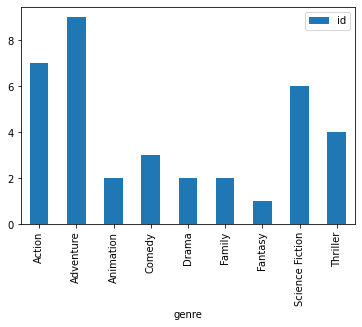

In [27]:
import matplotlib.pyplot as plt
movie_to_genres = genre
pop_movies = movies.sort_values('popularity', ascending=False)[:10]
# Use right join to merge the movie_to_genres and pop_movies tables
genres_movies = movie_to_genres.merge(pop_movies, how='right', 
                                      left_on="movie_id", 
                                      right_on="id")

# Count the number of genres
genre_count = genres_movies.groupby('genre').agg({'id':'count'})

# Plot a bar chart of the genre_count
genre_count.plot(kind='bar')
plt.show()

# Using outer join to select actors

One cool aspect of using an outer join is that, because it returns all rows from both merged tables and null where they do not match, you can use it to find rows that do not have a match in the other table. To try for yourself, you have been given two tables with a list of actors from two popular movies: Iron Man 1 and Iron Man 2. Most of the actors played in both movies. Use an outer join to find actors who did not act in both movies.

The Iron Man 1 table is called `iron_1_actors`, and Iron Man 2 table is called `iron_2_actors`. Both tables have been loaded for you and a few rows printed so you can see the structure.

In [52]:
iron_man1 = movies[movies['title']==("Iron Man")]
iron_man2 = movies[movies['title']==("Iron Man 2")]
casts = pd.read_pickle("dataset/casts.p")
print(iron_man1.columns)
print(casts.columns)

Index(['id', 'title', 'popularity', 'release_date'], dtype='object')
Index(['movie_id', 'cast_id', 'character', 'gender', 'id', 'name'], dtype='object')


In [53]:
iron_1_actors = iron_man1.merge(casts, left_on='id', right_on='movie_id', suffixes=('_iron_man1','_casts'),how='inner')
iron_1_actors = iron_1_actors[["character", "id_casts", "name"]]
iron_1_actors.rename(columns={'id_casts': 'id'}, inplace=True)

iron_2_actors = iron_man2.merge(casts, left_on='id', right_on='movie_id', suffixes=('_iron_man1','_casts'),how='inner')
iron_2_actors = iron_2_actors[["character", "id_casts", "name"]]
iron_2_actors.rename(columns={'id_casts': 'id'}, inplace=True)

In [54]:
# Merge iron_1_actors to iron_2_actors on id with outer join using suffixes
iron_1_and_2 = iron_1_actors.merge(iron_2_actors,
                                     on= "id",
                                     how = "outer",
                                     suffixes=('_1','_2'))

# Create an index that returns true if name_1 or name_2 are null
m = ((iron_1_and_2['name_1'].isnull()) | 
     (iron_1_and_2['name_2'].isnull()))

# Print the first few rows of iron_1_and_2
print(iron_1_and_2[m].head())

                                    character_1      id           name_1  \
0                                        Yinsen   17857       Shaun Toub   
2                   Obadiah Stane / Iron Monger    1229     Jeff Bridges   
3  Lt. Col. James "Rhodey" Rhodes / War Machine   18288  Terrence Howard   
5                                          Raza   57452      Faran Tahir   
8                                    Abu Bakaar  173810    Sayed Badreya   

  character_2 name_2  
0         NaN    NaN  
2         NaN    NaN  
3         NaN    NaN  
5         NaN    NaN  
8         NaN    NaN  


# Self join

Merging a table to itself can be useful when you want to compare values in a column to other values in the same column. In this exercise, you will practice this by creating a table that for each movie will list the movie director and a member of the crew on one row. You have been given a table called `crews`, which has columns `id`, `job`, and `name`. First, merge the table to itself using the movie ID. This merge will give you a larger table where for each movie, every job is matched against each other. Then select only those rows with a director in the left table, and avoid having a row where the director's job is listed in both the left and right tables. This filtering will remove job combinations that aren't with the director.

The `crews` table has been loaded for you.

In [55]:
crews = pd.read_pickle("dataset/crews.p")
# Merge the crews table to itself
crews_self_merged = crews.merge(crews, on='id', how='inner',
                                suffixes=('_dir','_crew'))

# Create a boolean index to select the appropriate rows
boolean_filter = ((crews_self_merged['job_dir'] == 'Director') & 
                  (crews_self_merged['job_crew'] != 'Director'))
direct_crews = crews_self_merged[boolean_filter]

# Print the first few rows of direct_crews
print(direct_crews.head())

        id department_dir   job_dir       name_dir department_crew  \
156  19995      Directing  Director  James Cameron         Editing   
157  19995      Directing  Director  James Cameron           Sound   
158  19995      Directing  Director  James Cameron      Production   
160  19995      Directing  Director  James Cameron         Writing   
161  19995      Directing  Director  James Cameron             Art   

           job_crew          name_crew  
156          Editor  Stephen E. Rivkin  
157  Sound Designer  Christopher Boyes  
158         Casting          Mali Finn  
160          Writer      James Cameron  
161    Set Designer    Richard F. Mays  


# How does pandas handle self joins?

Select the false statement about merging a table to itself.
- The pandas module limits you to one merge where you merge a table to itself. You cannot repeat this process over and over.

# Index merge for movie ratings

To practice merging on indexes, you will merge `movies` and a table called `ratings` that holds info about movie ratings. Make sure your merge returns all of the rows from the `movies` table and not all the rows of `ratings` table need to be included in the result.

The `movies` and `ratings` tables have been loaded for you.

In [57]:
ratings = pd.read_pickle("dataset/ratings.p")
# Merge to the movies table the ratings table on the index
movies_ratings = movies.merge(ratings, on="id")

# Print the first few rows of movies_ratings
print(movies_ratings.head())

      id                 title  popularity release_date  vote_average  \
0    257          Oliver Twist   20.415572   2005-09-23           6.7   
1  14290  Better Luck Tomorrow    3.877036   2002-01-12           6.5   
2  38365             Grown Ups   38.864027   2010-06-24           6.0   
3   9672              Infamous    3.680896   2006-11-16           6.4   
4  12819       Alpha and Omega   12.300789   2010-09-17           5.3   

   vote_count  
0       274.0  
1        27.0  
2      1705.0  
3        60.0  
4       124.0  


# Do sequels earn more?

It is time to put together many of the aspects that you have learned in this chapter. In this exercise, you'll find out which movie sequels earned the most compared to the original movie. To answer this question, you will merge a modified version of the `sequels` and `financials` tables where their index is the movie ID. You will need to choose a merge type that will return all of the rows from the `sequels` table and not all the rows of `financials` table need to be included in the result. From there, you will join the resulting table to itself so that you can compare the revenue values of the original movie to the sequel. Next, you will calculate the difference between the two revenues and sort the resulting dataset.

The `sequels` and `financials` tables have been provided.

In [64]:
sequels = pd.read_pickle("dataset/sequels.p")
financials = pd.read_pickle("dataset/financials.p")
# Merge sequels and financials on index id
sequels_fin = sequels.merge(financials, on='id', how='left')
print(sequels.columns)
print(financials.columns)
print(sequels_fin.columns)
sequels_fin.head()

Index(['id', 'title', 'sequel'], dtype='object')
Index(['id', 'budget', 'revenue'], dtype='object')
Index(['id', 'title', 'sequel', 'budget', 'revenue'], dtype='object')


,id,title,sequel,budget,revenue
0,19995,Avatar,<NA>,237000000.0,2.787965e+09
1,862,Toy Story,863,30000000.0,3.735540e+08
2,863,Toy Story 2,10193,90000000.0,4.973669e+08
3,597,Titanic,<NA>,200000000.0,1.845034e+09
4,24428,The Avengers,<NA>,220000000.0,1.519558e+09


In [67]:


# Self merge with suffixes as inner join with left on sequel and right on id
orig_seq = sequels_fin.merge(sequels_fin, how='inner', left_on='sequel', 
                             right_on='id', #right_index=True,
                             suffixes=('_org','_seq'))


In [68]:

# Add calculation to subtract revenue_org from revenue_seq 
orig_seq['diff'] = orig_seq['revenue_seq'] - orig_seq['revenue_org']

# Select the title_org, title_seq, and diff 
titles_diff = orig_seq[['title_org','title_seq','diff']]

# Print the first rows of the sorted titles_diff
print(titles_diff.sort_values('diff', ascending = False).head())

            title_org        title_seq          diff
28  Jurassic Park III   Jurassic World  1.144748e+09
26      Batman Begins  The Dark Knight  6.303398e+08
11         Iron Man 2       Iron Man 3  5.915067e+08
1         Toy Story 2      Toy Story 3  5.696028e+08
14  Quantum of Solace          Skyfall  5.224703e+08
